In [1]:
#appearance:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# seaborn as sns
#sns.set()

In [2]:
data = pd.read_csv("USA_CA_Modesto.Muni.AP.724926_TMY3_BASE.csv")
#data['datetime'] = pd.to_datetime(data['Date/Time'])

In [3]:
data.head()


,Date/Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
0,01/01 01:00:00,0.712377,2.894254,0,2.516708,0.0,0.069809,0.069809,0.069809,0.128562,0.026369,0.092943,0.379618,0.351395
1,01/01 02:00:00,0.607102,3.041735,0,2.737585,0.0,0.075936,0.075936,0.075936,0.074995,0.015382,0.076186,0.349528,0.280072
2,01/01 03:00:00,0.563318,3.020224,0,2.735789,0.0,0.075886,0.075886,0.075886,0.053568,0.010987,0.062326,0.345476,0.260637
3,01/01 04:00:00,0.552604,3.115433,0,2.825874,0.0,0.078385,0.078385,0.078385,0.053568,0.010987,0.053976,0.340613,0.266096
4,01/01 05:00:00,0.551332,3.162903,0,2.816787,0.0,0.078133,0.078133,0.078133,0.053568,0.010987,0.065823,0.327746,0.323539


In [4]:
drop_cols = [x for x in data.columns if ('Electricity' not in x) and ('Date/Time' not in x) ]
data_el = data.drop(drop_cols,axis=1)
data_el['total']=data_el[[x for x in data_el.columns if ('Electricity' in x)]].sum(axis=1)

# rescale electricity demand
data_el['total'] = data_el['total']
print(data_el['total'].head())
print(data_el['total'].describe())
data_el.head()

0    1.549298
1    1.351001
2    1.263334
3    1.246903
4    1.243855
Name: total, dtype: float64
count    8760.000000
mean        2.328451
std         1.494559
min         0.762471
25%         1.365483
50%         1.775000
75%         2.975437
max        11.931335
Name: total, dtype: float64


,Date/Time,Electricity:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),total
0,01/01 01:00:00,0.712377,0,0.0,0.069809,0.069809,0.069809,0.128562,0.026369,0.092943,0.379618,1.549298
1,01/01 02:00:00,0.607102,0,0.0,0.075936,0.075936,0.075936,0.074995,0.015382,0.076186,0.349528,1.351001
2,01/01 03:00:00,0.563318,0,0.0,0.075886,0.075886,0.075886,0.053568,0.010987,0.062326,0.345476,1.263334
3,01/01 04:00:00,0.552604,0,0.0,0.078385,0.078385,0.078385,0.053568,0.010987,0.053976,0.340613,1.246903
4,01/01 05:00:00,0.551332,0,0.0,0.078133,0.078133,0.078133,0.053568,0.010987,0.065823,0.327746,1.243855


In [5]:
#sns.lineplot(x='Date/Time',y='total',data=data_el[0:168])

In [6]:
if False: ## plotting
    for day in range(4):
      d= data_el[day*24:(day+1)*24]
      plt.plot(x='Date/Time',y='total',data=d)


In [7]:
data_solar = pd.read_csv("modesto_solar_residential_7kw.csv",header=None)
#solar data prep
data_solar.columns=['date','PV']
data_solar.index=[i for i in range(len(data_solar))]
data_solar.drop(index=[i for i in range(9)],inplace=True,axis=0) # drop 0 and 1:8 (UTC)
data_solar.index=[i for i in range(len(data_solar))]
data_solar['PV']=data_solar['PV']/1000
#rescale the 7kW system to our size
system_size=7
# user input:
solar_kW=4
data_solar['PV']=data_solar['PV']*solar_kW/system_size

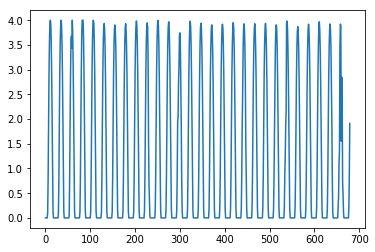

In [8]:
plt.plot(data_solar['PV'])

In [9]:
data_solar.head()

,date,PV
0,2019-04-18 09:00:00+00:00,-0.000806
1,2019-04-18 10:00:00+00:00,-0.000806
2,2019-04-18 11:00:00.000013+00:00,-0.000806
3,2019-04-18 12:00:00+00:00,-0.000806
4,2019-04-18 13:00:00+00:00,-0.000806


In [10]:
N_el = len(data_el)//24 # days
N_solar = len(data_solar)//24 # days
samp_interv_el=30 # days
samp_interv_solar=10 # days

data_ar=[]
solar_ar=[]
elec_ar = []
time_ar = []

import random
random.seed(211)
N_samples= 10000
for i in range(N_samples):
    idx_el = random.randint(0,N_el-samp_interv_el-samp_interv_solar)
    idx_solar = random.randint(0,N_solar-samp_interv_solar)
    elec = np.asarray(data_el[idx_el*24:(idx_el+samp_interv_el)*24]['total'])
    time = np.asarray(data_el[idx_el*24:(idx_el+samp_interv_el)*24]['Date/Time'])

    sol = np.asarray(data_solar[idx_solar*24:(idx_solar+samp_interv_solar)*24]['PV'])
    net_load = elec.copy()
    net_load[-samp_interv_solar*24:] = net_load[-samp_interv_solar*24:]-sol
    data_ar.append(net_load)
    solar_ar.append(sol)
    elec_ar.append(elec)
    time_ar.append(time)
    
data_ar = np.asarray(data_ar)

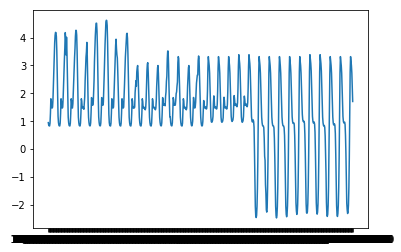

In [11]:
plt.plot(time_ar[0],data_ar[0])
plt.savefig('initial_profile.jpeg')

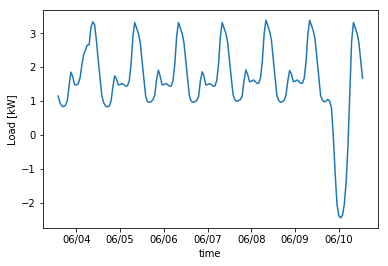

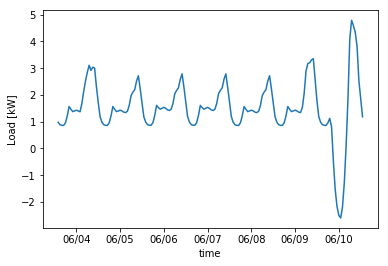

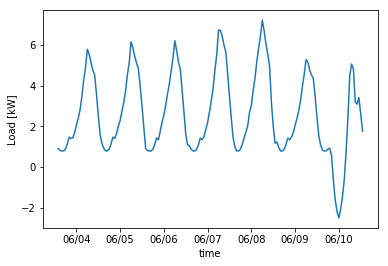

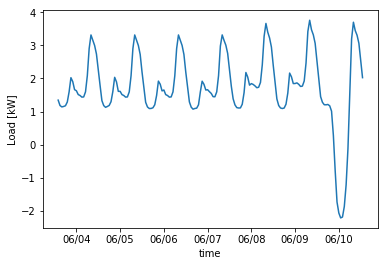

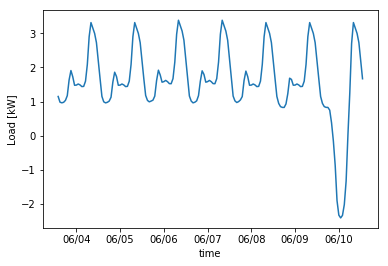

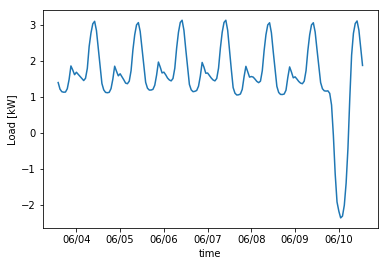

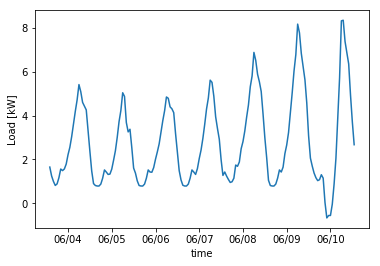

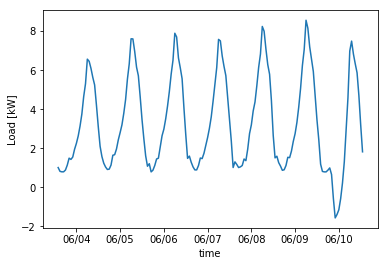

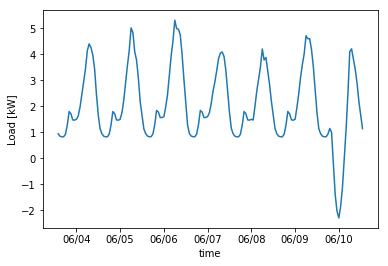

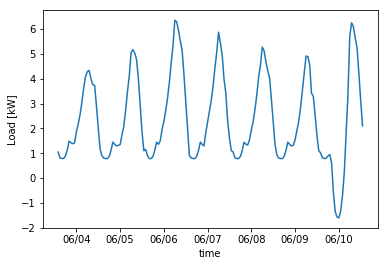

In [27]:
for i in range(10):
    plt.plot(data_ar[i,14*24:21*24])
    plt.xlabel('time')

    plt.xticks([i*24+10 for i in range(7)],['06/04','06/05','06/06','06/07','06/08','06/09','06/10'])

    plt.ylabel('Load [kW]')    
    plt.savefig('plot1/profile1-{}.jpeg'.format(i)) #, transparent=True)
    plt.show()
    

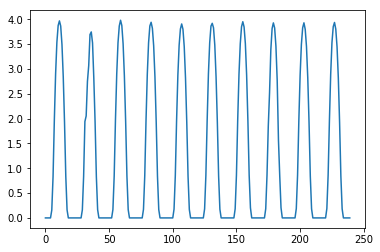

In [13]:
plt.plot(solar_ar[0])

## Analysis

Pick a sliding window size 

In [14]:
sig = []
bck = []
delta = []
for data in data_ar:
    sstart = -samp_interv_solar*24
    send = sstart + 24
    s = data[sstart:send]
    b = data[:-samp_interv_solar*24]
    #print(len(s), len(b))
    #print(b)
    save = np.mean(s)
    bave = np.mean(b)
    sstd = np.std(s)
    bstd = np.std(b)
    smax = np.max(s)
    bmax = np.max(b)
    smin = np.min(s)
    bmin = np.min(b)
    #print(smin,bmin)
    dave = save - bave
    dstd = sstd - bstd
    dmax = smax - bmax
    dmin = smin - bmin
    sig.append([save, sstd, smax, smin, 1])
    bck.append([bave, bstd, bmax, bmin, 0])
    delta.append( [dave, dstd, dmax, dmin])
sig = np.asarray(sig)
bck = np.asarray(bck)
delta = np.asarray(delta)

print(sig.shape, bck.shape, delta.shape)

(10000, 5) (10000, 5) (10000, 4)


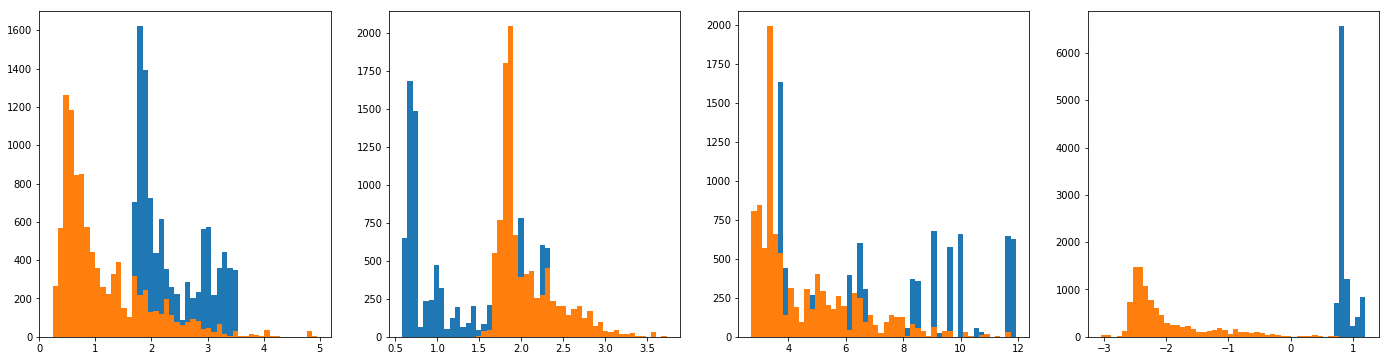

In [15]:
fig = plt.figure(figsize=(24,6))
for k in range(4):
    fig.add_subplot(1,4,k+1)
    b = bck[:,k]
    s = sig[:,k]
    l = np.min([s,b])
    u = np.max([s,b])
    
    plt.hist(bck[:,k], bins=50, range=[l,u])
    plt.hist(sig[:,k], bins=50, range=[l,u])
plt.show()

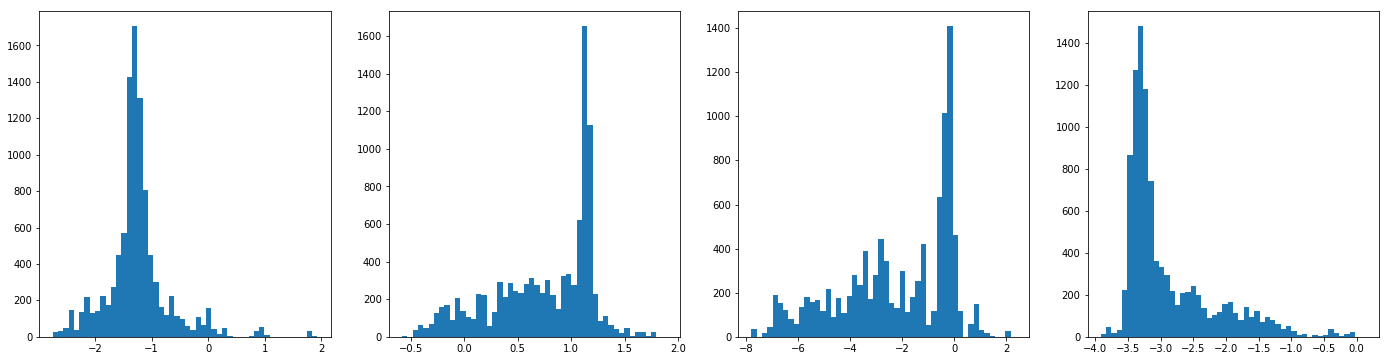

In [16]:
fig = plt.figure(figsize=(24,6))
for k in range(4):
    fig.add_subplot(1,4,k+1)
    plt.hist(delta[:,k], bins=50)
plt.show()